In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
verbose = False

In [3]:
df = pd.read_csv('../datasets/grb_table_1729082755.txt', encoding='ISO-8859-1', delimiter='\t')

df.head()

,GRB,Time [UT],Trigger Number,BAT RA (J2000),BAT Dec (J2000),BAT 90% Error Radius [arcmin],BAT T90 [sec],BAT Fluence (15-150 keV) [10^-7 erg/cm^2],BAT Fluence 90% Error (15-150 keV) [10^-7 erg/cm^2],BAT 1-sec Peak Photon Flux (15-150 keV) [ph/cm^2/sec],...,UVOT 90% Error Radius [arcsec],UVOT Time to First Observation [sec],UVOT Magnitude,UVOT Other Filter Magnitudes,Other Observatory Detections,Redshift,Host Galaxy,Comments,References,Burst Advocate
0,241006A,21:51:58,1258721,304.794,-40.796,3,NaN,NaN,NaN,NaN,...,NaN,350,V>17.4,B>19.0|U>17.9|UVW1>18.8|White>21.0,NaN,NaN,NaN,UVOT: no detection,NaN,Rahul Gupta
1,241002A,00:50:22,1257556,140.942,39.829,1.0,46.81,21,1,1.7,...,NaN,116,V>19.8,B>19.8|U>19.6|UVW1>19.0|UVW2>20.5|UVM2>20.3|Wh...,NaN,NaN,NaN,UVOT: no detection,NaN,Regina Caputo
2,241001A,17:08:45,SVOM-ECLAIRs,20.42,-43.53,NaN,NaN,NaN,NaN,NaN,...,NaN,6534,NaN,U=20.20,NaN,NaN,NaN,SVOM-ECLAIRs: GCN 37655|XRT: Source 2 is spati...,NaN,NaN
3,240916A,01:22:55,Fermi,233.2,-7.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fermi: GCN 37518,NaN,NaN
4,240912A,01:46:39,1253910,124.625,33.999,1.0,113.24,450,0,15.8,...,0.43,115,V=17.78,B=19.08|U=18.14|UVW1=17.76|UVM2>17.18|UVW2=18....,"Fermi (GBM), GTC (10.4m), NOT (2.56m), INTEGRA...",1.234 (GTC: absorption)|1.23 (NOT: absorption),"g = 23.08, r = 22.88, and z = 22.01 (LCOGT/Leg...",NaN,NaN,Phil Evans


In [4]:
df.dropna(subset=['BAT RA (J2000)', 'BAT Dec (J2000)',"BAT T90 [sec]"], inplace=True)

# df.fillna(-1, inplace=True)

columns_to_drop = ['GRB','Time [UT]',"Trigger Number","BAT RA (J2000)","BAT Fluence 90% Error (15-150 keV) [10^-7 erg/cm^2]",'BAT Dec (J2000)', 'BAT 90% Error Radius [arcmin]',"XRT Column Density (NH) [10^21 cm^-2]","BAT 1-sec Peak Photon Flux 90% Error (15-150 keV) [ph/cm^2/sec]","BAT Photon Index 90% Error (15-150 keV)","XRT 90% Error Radius [arcsec]","XRT Time to First Observation [sec]","UVOT Time to First Observation [sec]"]
# print(fdf.columns)
for column in df.columns :
    df[column] = df[column].replace({'~': ''}, regex=True)  # Remove '~' character
    df[column] = pd.to_numeric(df[column], errors='coerce')  # Convert to numeric, setting errors to NaN
    found_ratio = df[column].count()/df[column].index.size
    if verbose :
        print(f"Missing values in {column} : {df[column].count()} over {df[column].index.size} for a % of : {found_ratio}")
    if (found_ratio*100 < 75.0) :
        columns_to_drop.append(column)
        print(f"Missing values in {column} : {df[column].count()} over {df[column].index.size} for a % of : {found_ratio}")
        print(f"Dropping column {column} not enough usable data")

df_sub = df.drop(columns=columns_to_drop, axis=1)



Missing values in GRB : 324 over 1551 for a % of : 0.20889748549323017
Dropping column GRB not enough usable data
Missing values in Time [UT] : 0 over 1551 for a % of : 0.0
Dropping column Time [UT] not enough usable data
Missing values in BAT Photon Index (15-150 keV) (PL = simple power-law, CPL = cutoff power-law) : 11 over 1551 for a % of : 0.0070921985815602835
Dropping column BAT Photon Index (15-150 keV) (PL = simple power-law, CPL = cutoff power-law) not enough usable data
Missing values in XRT RA (J2000) : 0 over 1551 for a % of : 0.0
Dropping column XRT RA (J2000) not enough usable data
Missing values in XRT Dec (J2000) : 0 over 1551 for a % of : 0.0
Dropping column XRT Dec (J2000) not enough usable data
Missing values in XRT Early Flux (0.3-10 keV) [10^-11 erg/cm^2/s] : 681 over 1551 for a % of : 0.43907156673114117
Dropping column XRT Early Flux (0.3-10 keV) [10^-11 erg/cm^2/s] not enough usable data
Missing values in UVOT RA (J2000) : 0 over 1551 for a % of : 0.0
Dropping c

In [5]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1551 entries, 1 to 1875
Data columns (total 7 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   BAT T90 [sec]                                          1540 non-null   float64
 1   BAT Fluence (15-150 keV) [10^-7 erg/cm^2]              1534 non-null   float64
 2   BAT 1-sec Peak Photon Flux (15-150 keV) [ph/cm^2/sec]  1503 non-null   float64
 3   XRT 11 Hour Flux (0.3-10 keV) [10^-11 erg/cm^2/s]      1270 non-null   float64
 4   XRT 24 Hour Flux (0.3-10 keV) [10^-11 erg/cm^2/s]      1283 non-null   float64
 5   XRT Initial Temporal Index                             1293 non-null   float64
 6   XRT Spectral Index (Gamma)                             1316 non-null   float64
dtypes: float64(7)
memory usage: 96.9 KB


In [6]:
for column in df_sub.columns :
    nan_count = df_sub[column].isna().sum()
    print(f"Number of NaN values in the {column}: {nan_count}")

Number of NaN values in the BAT T90 [sec]: 11
Number of NaN values in the BAT Fluence (15-150 keV) [10^-7 erg/cm^2]: 17
Number of NaN values in the BAT 1-sec Peak Photon Flux (15-150 keV) [ph/cm^2/sec]: 48
Number of NaN values in the XRT 11 Hour Flux (0.3-10 keV) [10^-11 erg/cm^2/s]: 281
Number of NaN values in the XRT 24 Hour Flux (0.3-10 keV) [10^-11 erg/cm^2/s]: 268
Number of NaN values in the XRT Initial Temporal Index: 258
Number of NaN values in the XRT Spectral Index (Gamma): 235


In [7]:
df_sub = df_sub.dropna()
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1213 entries, 1 to 1870
Data columns (total 7 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   BAT T90 [sec]                                          1213 non-null   float64
 1   BAT Fluence (15-150 keV) [10^-7 erg/cm^2]              1213 non-null   float64
 2   BAT 1-sec Peak Photon Flux (15-150 keV) [ph/cm^2/sec]  1213 non-null   float64
 3   XRT 11 Hour Flux (0.3-10 keV) [10^-11 erg/cm^2/s]      1213 non-null   float64
 4   XRT 24 Hour Flux (0.3-10 keV) [10^-11 erg/cm^2/s]      1213 non-null   float64
 5   XRT Initial Temporal Index                             1213 non-null   float64
 6   XRT Spectral Index (Gamma)                             1213 non-null   float64
dtypes: float64(7)
memory usage: 75.8 KB


In [8]:
df_sub['category'] = df_sub['BAT T90 [sec]'].apply(lambda x: 'low' if x < 2 else ('high' if x > 20 else 'undefined'))


In [9]:
df_sub.tail(5)

,BAT T90 [sec],BAT Fluence (15-150 keV) [10^-7 erg/cm^2],BAT 1-sec Peak Photon Flux (15-150 keV) [ph/cm^2/sec],XRT 11 Hour Flux (0.3-10 keV) [10^-11 erg/cm^2/s],XRT 24 Hour Flux (0.3-10 keV) [10^-11 erg/cm^2/s],XRT Initial Temporal Index,XRT Spectral Index (Gamma),category
1860,8.1,2.27,0.67,0.026116,0.014064,-0.7933,1.69583,undefined
1863,19.2,50.20,7.42,0.176536,0.060249,-0.9504,1.98740,undefined
1864,24.8,8.38,0.71,0.008134,0.003072,-1.2480,2.25175,high
1865,4.0,11.90,5.46,0.105986,0.029643,-1.6330,1.96901,undefined
1870,109.1,167.00,7.35,0.178803,0.041229,-1.8810,2.12918,high


In [10]:
X = df_sub.drop(columns=['category'])  
y = df_sub['category']

In [11]:
print('low : ', (df_sub['category'] == "low").sum())
print('high: ', (df_sub['category'] == "high").sum())
print('undefined',(df_sub['category'] == "undefined").sum())


low :  72
high:  804
undefined 337


In [12]:
# Algorithme de K-means
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

# Centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

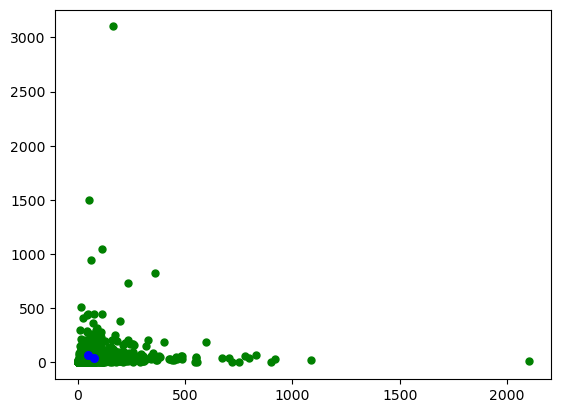

In [13]:
#Visualisation des clusters et des centroïdes 

# Liste des couleurs
colors = ["g.","r."]

# Graphique du nuage de points attribués au cluster correspondant
for i in range(len(df_sub)):
    plt.plot(X.iloc[i,0], X.iloc[i,1], colors[labels[i]], markersize = 10)

# Graphique des centroïdes
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "o", color = "blue",s=30, linewidths = 1, zorder = 10)
plt.show()

In [14]:
print(len(labels), len(df))


1213 1551


In [15]:
# Importation de la fonction cdist du package scipy.spatial.distance
from scipy.spatial.distance import cdist

# Liste des nombres de clusters
range_n_clusters = [2, 3, 4, 5, 6]  

# Initialisation de la liste de distorsions
distorsions = []

# Calcul des distorsions pour les différents modèles
for n_clusters in range_n_clusters:
    
    # Initialisation d'un cluster ayant un pour nombre de clusters n_clusters
    cluster = KMeans(n_clusters = n_clusters)
    
    # Apprentissage des données suivant le cluster construit ci-dessus
    cluster.fit(X)
    
    # Ajout de la nouvelle distorsion à la liste des données
    distorsions.append(sum(np.min(cdist(X, cluster.cluster_centers_, 'euclidean'), axis=1)) / np.size(X, axis = 0))

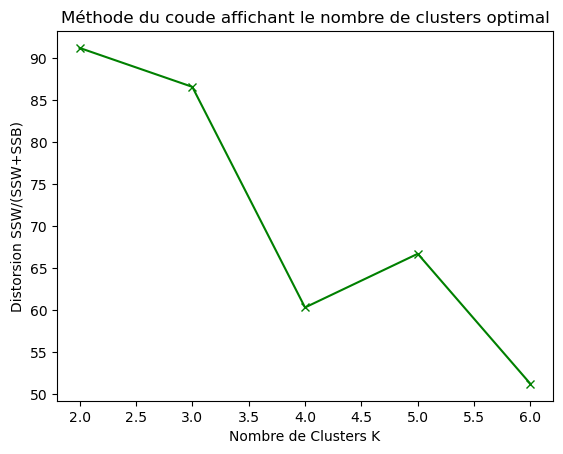

In [16]:
# Visualisation des distorsions en fonction du nombre de clusters
plt.plot(range_n_clusters, distorsions, 'gx-')
plt.xlabel('Nombre de Clusters K')
plt.ylabel('Distorsion SSW/(SSW+SSB)')
plt.title('Méthode du coude affichant le nombre de clusters optimal')
plt.show()
